In [51]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
forest = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/NEURAL NETWORK/ASSIGNMENT/forestfires.csv") 
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month'])
forest['day']= label_encoder.fit_transform(forest['day'])

In [4]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
seed = 31
numpy.random.seed(seed)

In [17]:
X = forest.iloc[:,0:30]


In [18]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Y = forest.iloc[:,10]
Y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [67]:
model = Sequential() 
model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 

In [69]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('area~month',data=forest).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(forest['month'])))
rmse_linear = np.sqrt(np.mean((np.array(forest['area'])-np.array(pred_linear))**2))
rmse_linear

63.56355518599207

In [57]:
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10) 

Epoch 1/150
35/35 [==============================] - 1s 22ms/step - loss: -14568861696.0000 - acc: 0.0000e+00 - val_loss: -20740036608.0000 - val_acc: 0.0000e+00
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: -14585250816.0000 - acc: 0.0000e+00 - val_loss: -20766154752.0000 - val_acc: 0.0000e+00
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: -14602589184.0000 - acc: 0.0000e+00 - val_loss: -20789526528.0000 - val_acc: 0.0000e+00
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: -14619931648.0000 - acc: 0.0000e+00 - val_loss: -20806328320.0000 - val_acc: 0.0000e+00
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: -14636127232.0000 - acc: 0.0000e+00 - val_loss: -20835811328.0000 - val_acc: 0.0000e+00
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: -14654364672.0000 - acc: 0.0000e+00 - val_loss: -20855517184.0000 - val_acc: 0.0000e+00
Epoch 7/150
35/35 [==============

35/35 [==============================] - 0s 3ms/step - loss: -16316126208.0000 - acc: 0.0000e+00 - val_loss: -23229939712.0000 - val_acc: 0.0000e+00
Epoch 102/150
35/35 [==============================] - 0s 3ms/step - loss: -16334177280.0000 - acc: 0.0000e+00 - val_loss: -23255054336.0000 - val_acc: 0.0000e+00
Epoch 103/150
35/35 [==============================] - 0s 3ms/step - loss: -16352625664.0000 - acc: 0.0000e+00 - val_loss: -23278995456.0000 - val_acc: 0.0000e+00
Epoch 104/150
35/35 [==============================] - 0s 3ms/step - loss: -16370987008.0000 - acc: 0.0000e+00 - val_loss: -23302602752.0000 - val_acc: 0.0000e+00
Epoch 105/150
35/35 [==============================] - 0s 3ms/step - loss: -16388774912.0000 - acc: 0.0000e+00 - val_loss: -23329781760.0000 - val_acc: 0.0000e+00
Epoch 106/150
35/35 [==============================] - 0s 7ms/step - loss: -16406118400.0000 - acc: 0.0000e+00 - val_loss: -23360827392.0000 - val_acc: 0.0000e+00
Epoch 107/150
35/35 [===============

Text(0, 0.5, 'month')

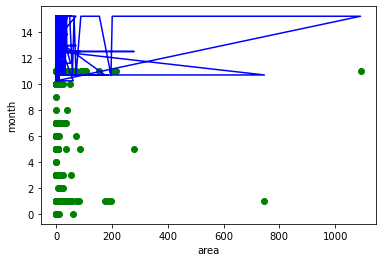

In [68]:
plt.scatter(x=forest['area'],y=forest['month'],color='green')
plt.plot(forest['area'],pred_linear ,color='blue')
plt.xlabel('area')
plt.ylabel('month') 